In [1]:
# Import dependencies
import pandas as pd
import numpy as np
from decimal import Decimal
from fractions import Fraction

from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,precision_score
import matplotlib.pyplot as plt
import yfinance as yf


## Extract the Data

In [24]:

# Dow_stock = Dow_df = pd.read_csv('../csv/Dow_Jones_daily.csv')
# Nasdaq_df= pd.read_csv('../csv/Nasdaq_daily.csv')
# sp_df = pd.read_csv('../csv/S&P_daily.csv')
sP500 = yf.Ticker("^GSPC")
sp_df = sP500.history(start="2008-01-01",interval = "1wk",end=None)

NASDAQ = yf.Ticker("^IXIC")
Nasdaq_df = NASDAQ.history(start="2008-01-01",end=None)

DowJ= yf.Ticker("^DJI")

Dow_df = DowJ.history(start="2008-01-01",end=None)


In [26]:
Dow_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-08-25 00:00:00-04:00,34217.058594,34441.910156,34029.218750,34346.898438,257440000,0.0,0.0
2023-08-28 00:00:00-04:00,34441.640625,34652.910156,34441.640625,34559.980469,224640000,0.0,0.0
2023-08-29 00:00:00-04:00,34531.121094,34864.421875,34531.121094,34852.671875,262550000,0.0,0.0
2023-08-30 00:00:00-04:00,34847.800781,35025.570312,34811.738281,34890.238281,236070000,0.0,0.0
2023-08-31 00:00:00-04:00,34909.089844,35070.199219,34909.101562,34970.410156,37773262,0.0,0.0


In [15]:
Dow_df.columns
# sp_df = sp_df.astype({"Date": "datetime64"})


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [10]:
# plot1=sp_df.plot(x="Date",y="Close")

# plot2=Nasdaq_df.plot(ax=plot1,x="Date",y="Close")

# Dow_df.plot(ax=plot2,x="Date",y="Close")

# plt.xticks(rotation=45)
# plt.show()

In [11]:
# sp_df = sp_df.astype({"Date": "datetime64"})
# sp_df.sort_values(by='Date', inplace = True)

# sp_df=sp_df.set_index('Date')
# sp_df

In [17]:
#def 
def predict(train, test, predictors, model):
    
    model = RandomForestRegressor()
    X=stock_df[['Open', 'High', 'Low' ]]
    X=X[:int(len(sp_df)-1)]
    Y=sp_df['Close']
    Y=Y[:int(len(sp_df)-1)]
    model.fit(X,Y)

RandomForestRegressor()

In [18]:
predictions = model.predict(X)
model.score(X,Y)

0.999830076619977

In [19]:
predictions

array([1427.59053345, 1407.33659912, 1339.66555908, 1326.41397461,
       1381.00098022, 1335.81839478, 1352.43489014, 1363.28792114,
       1338.24767578, 1279.72549438, 1283.9754895 , 1338.50660522,
       1321.13166504, 1368.84262817, 1336.28196045, 1376.3013269 ,
       1392.02370239, 1407.7887854 , 1407.10186646, 1425.2297876 ,
       1378.84063477, 1391.52152954, 1366.90750244, 1355.01951294,
       1323.96859375, 1281.69209717, 1251.21372925, 1236.90773804,
       1252.8504895 , 1241.66300171, 1248.37860352, 1296.54455444,
       1281.49557861, 1270.95456909, 1282.13996338, 1264.41802734,
       1216.33886475, 1193.26747681, 1125.07751221, 1071.06331116,
        981.52188416,  979.12190979,  889.85118774,  936.15769104,
        931.50401062,  858.79730103,  827.99590454,  839.2446106 ,
        891.14470886,  871.6648053 ,  880.46890137,  869.26878967,
        916.33680298,  888.35490723,  848.85099854,  834.22910828,
        833.4860022 ,  864.57611145,  831.28321777,  767.79201

In [21]:
test_data = sp_df[['Open', 'High', 'Low' ]].tail(5)
prediction = model.predict(test_data)
print("the model prediction stock value is :",prediction)
print("the actual value:",sp_df[["Close"]].tail(5))

the model prediction stock value is : [4536.18868164 4490.25894043 4406.28568359 4425.17330566 4492.97622559]
the actual value:                                  Close
Date                                  
2023-08-01 00:00:00-04:00  4518.439941
2023-08-08 00:00:00-04:00  4489.720215
2023-08-15 00:00:00-04:00  4399.770020
2023-08-22 00:00:00-04:00  4433.310059
2023-08-29 00:00:00-04:00  4514.870117


In [22]:
import pickle
pickle.dump(model, open('model.pkl', 'wb')) #write as binary
model = pickle.load(open('model.pkl', 'rb'))#read as binary
print(model.predict(test_data))


[4536.18868164 4490.25894043 4406.28568359 4425.17330566 4492.97622559]


##Stock prediction analysis for Dow_df  using Random Forest model

In [24]:
Dow_stock

,Date,Open_Dow,High_Dow,Low_Dow,Close_Dow
0,8/22/23,44048.41,44052.77,43704.59,43746.74
1,8/21/23,43714.83,43954.95,43495.57,43873.30
2,8/18/23,43226.74,43724.70,43226.74,43606.81
3,8/17/23,44076.54,44106.83,43535.83,43582.21
4,8/16/23,44236.07,44422.74,43945.35,43951.78
...,...,...,...,...,...
3934,1/8/08,14181.98,14328.19,13901.54,13915.82
3935,1/7/08,14154.51,14265.25,14051.74,14181.97
3936,1/4/08,14154.51,14524.53,14150.16,14154.51
3937,1/3/08,14524.54,14632.08,14494.32,14524.54


In [25]:
Dow_stock = Dow_stock.astype({"Date": "datetime64"})
Dow_stock.sort_values(by='Date', inplace = True)

Dow_stock=Dow_stock.set_index('Date')
Dow_stock

,Open_Dow,High_Dow,Low_Dow,Close_Dow
Date,,,,
2008-01-02,14547.08,14788.31,14493.37,14547.08
2008-01-03,14524.54,14632.08,14494.32,14524.54
2008-01-04,14154.51,14524.53,14150.16,14154.51
2008-01-07,14154.51,14265.25,14051.74,14181.97
2008-01-08,14181.98,14328.19,13901.54,13915.82
...,...,...,...,...
2023-08-16,44236.07,44422.74,43945.35,43951.78
2023-08-17,44076.54,44106.83,43535.83,43582.21
2023-08-18,43226.74,43724.70,43226.74,43606.81


In [26]:
Dow_stock=Dow_stock.dropna(how = 'any')


In [27]:
print(Dow_stock.columns.tolist())


[' Open_Dow', ' High_Dow', ' Low_Dow', ' Close_Dow']


In [28]:
Dow_stock["Tomorrow"] = Dow_stock[" Close_Dow"].shift(-1)

In [30]:
Dow_stock["Target"] = (Dow_stock["Tomorrow"] > Dow_stock[" Close_Dow"]).astype(int)


In [34]:
#predicting stock price for last 100 days by training the model with previous history data which is from 2008
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
# model = RandomForestRegressor(n_estimators=100, min_samples_split=100, random_state=1)

train = Dow_stock.iloc[:-100]# all rows except last 100 rows/days 
test = Dow_stock.iloc[-100:] #last 100 days or rows

predictors =[' Open_Dow', ' High_Dow', ' Low_Dow', ' Close_Dow']
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [32]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.5208333333333334

#The precision score is 52% for dow jones 

<AxesSubplot:xlabel='Date'>

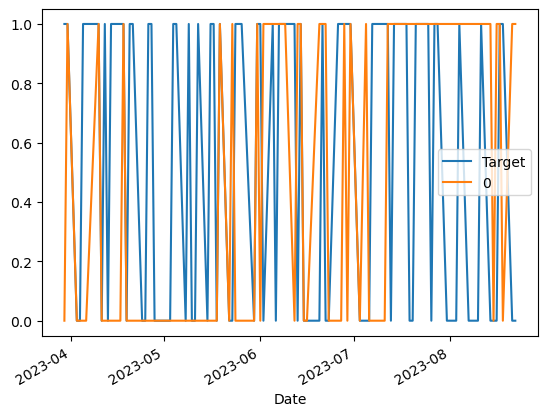

In [241]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

Blue indicates actual closing price target  for Dow jones
Orange indicates the wht the model predicts 


In [190]:
def predict(train, test, predictors, model):
    
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [191]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [192]:
predictions = backtest(Dow_stock, model, predictors)

In [193]:
predictions["Predictions"].value_counts()

0    785
1    654
Name: Predictions, dtype: int64

In [194]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5244648318042814

In [195]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.539958
0    0.460042
Name: Target, dtype: float64

In [242]:
predictions

,Target,Predictions
Date,,
2017-12-05,0,0
2017-12-06,1,0
2017-12-07,1,0
2017-12-08,1,0
2017-12-11,1,0
...,...,...
2023-08-16,0,1
2023-08-17,1,1
2023-08-18,1,1


In [196]:
import functools as ft
dfs= [Dow_df,Nasdaq_df,sp_df]
indexes = ft.reduce(lambda left, right: pd.merge(left, right, on='Date'), dfs)
indexes

,Date,Open_Dow,High_Dow,Low_Dow,Close_Dow,Average_Dow,Open_Nasdaq,High_Nasdaq,Low_Nasdaq,Close_Nasdaq,Average_Nasdaq,Open_S&P,High_S&P,Low_S&P,Close_S&P,Average_S&P
0,8/22/23,44048.41,44052.77,43704.59,43746.74,43897.575,13593.94,13598.76,13484.38,13505.87,13549.905,4415.33,4418.59,4382.77,4387.55,4401.440
1,8/21/23,43714.83,43954.95,43495.57,43873.30,43794.065,13347.26,13516.86,13325.59,13497.59,13422.425,4380.28,4407.55,4360.30,4399.77,4390.025
2,8/18/23,43226.74,43724.70,43226.74,43606.81,43416.775,13190.02,13335.87,13161.76,13290.78,13240.400,4344.88,4381.82,4335.31,4369.71,4357.295
3,8/17/23,44076.54,44106.83,43535.83,43582.21,43829.375,13527.30,13535.09,13303.44,13316.93,13422.115,4416.32,4421.17,4364.83,4370.36,4393.340
4,8/16/23,44236.07,44422.74,43945.35,43951.78,44093.925,13593.17,13644.32,13473.03,13474.63,13533.900,4433.79,4449.95,4403.55,4404.33,4419.060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3931,1/8/08,14181.98,14328.19,13901.54,13915.82,14048.900,2508.00,2527.42,2440.51,2440.51,2474.255,1422.15,1430.28,1388.30,1390.19,1406.170
3932,1/7/08,14154.51,14265.25,14051.74,14181.97,14168.240,2513.10,2521.62,2471.23,2499.46,2506.280,1417.97,1423.87,1403.45,1416.18,1417.075
3933,1/4/08,14154.51,14524.53,14150.16,14154.51,14154.510,2571.08,2571.08,2502.68,2504.65,2537.865,1411.63,1444.01,1411.19,1411.63,1411.630
3934,1/3/08,14524.54,14632.08,14494.32,14524.54,14524.540,2612.40,2624.27,2592.18,2602.68,2607.540,1447.16,1456.80,1443.73,1447.16,1447.160


In [197]:

indexes = indexes.drop(columns=[' Open_Dow', ' High_Dow', ' Low_Dow', ' Close_Dow',' Open_Nasdaq', ' High_Nasdaq', ' Low_Nasdaq',' Close_Nasdaq',' Open_S&P', ' High_S&P', ' Low_S&P',' Close_S&P'])

In [198]:
indexes

,Date,Average_Dow,Average_Nasdaq,Average_S&P
0,8/22/23,43897.575,13549.905,4401.440
1,8/21/23,43794.065,13422.425,4390.025
2,8/18/23,43416.775,13240.400,4357.295
3,8/17/23,43829.375,13422.115,4393.340
4,8/16/23,44093.925,13533.900,4419.060
...,...,...,...,...
3931,1/8/08,14048.900,2474.255,1406.170
3932,1/7/08,14168.240,2506.280,1417.075
3933,1/4/08,14154.510,2537.865,1411.630
3934,1/3/08,14524.540,2607.540,1447.160


In [199]:
fedfunds_df = pd.read_csv('../csv/FedFundsDaily.csv')
inflation_df = pd.read_csv('../csv/InflationRateDaily.csv')
# macro = pd.merge(fedfunds_df,inflation_df, on= "Date",how="left")
macro = pd.merge(fedfunds_df,inflation_df, on= "Date", how= "left")

macro

,Date,DFF,Inflation_Rate
0,1/1/08,3.06,NaN
1,1/2/08,4.11,2.32
2,1/3/08,4.25,2.33
3,1/4/08,4.18,2.32
4,1/5/08,4.18,NaN
...,...,...,...
5708,8/18/23,5.33,2.32
5709,8/19/23,5.33,NaN
5710,8/20/23,5.33,NaN
5711,8/21/23,5.33,2.34


In [200]:
macro_index = pd.merge(macro,indexes,on="Date", how= "left")
macro_index=macro_index.dropna(how = 'any')
macro_index

,Date,DFF,Inflation_Rate,Average_Dow,Average_Nasdaq,Average_S&P
1,1/2/08,4.11,2.32,14547.080,2631.435,1447.160
2,1/3/08,4.25,2.33,14524.540,2607.540,1447.160
3,1/4/08,4.18,2.32,14154.510,2537.865,1411.630
6,1/7/08,4.27,2.29,14168.240,2506.280,1417.075
7,1/8/08,4.27,2.29,14048.900,2474.255,1406.170
...,...,...,...,...,...,...
5706,8/16/23,5.33,2.32,44093.925,13533.900,4419.060
5707,8/17/23,5.33,2.33,43829.375,13422.115,4393.340
5708,8/18/23,5.33,2.32,43416.775,13240.400,4357.295
5711,8/21/23,5.33,2.34,43794.065,13422.425,4390.025


In [201]:
macro_index.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3936 entries, 1 to 5712
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            3936 non-null   object 
 1   DFF             3936 non-null   float64
 2   Inflation_Rate  3936 non-null   object 
 3   Average_Dow     3936 non-null   float64
 4   Average_Nasdaq  3936 non-null   float64
 5   Average_S&P     3936 non-null   float64
dtypes: float64(4), object(2)
memory usage: 215.2+ KB


In [202]:

macro_index['Inflation_Rate'] = pd.to_numeric(macro_index['Inflation_Rate'], errors='coerce')
macro_index = macro_index.astype({"Date": "datetime64"})

macro_index = macro_index.set_index("Date")
macro_index

# macro_index.dtypes

,DFF,Inflation_Rate,Average_Dow,Average_Nasdaq,Average_S&P
Date,,,,,
2008-01-02,4.11,2.32,14547.080,2631.435,1447.160
2008-01-03,4.25,2.33,14524.540,2607.540,1447.160
2008-01-04,4.18,2.32,14154.510,2537.865,1411.630
2008-01-07,4.27,2.29,14168.240,2506.280,1417.075
2008-01-08,4.27,2.29,14048.900,2474.255,1406.170
...,...,...,...,...,...
2023-08-16,5.33,2.32,44093.925,13533.900,4419.060
2023-08-17,5.33,2.33,43829.375,13422.115,4393.340
2023-08-18,5.33,2.32,43416.775,13240.400,4357.295


In [203]:
macro_index['Inflation_Rate'].isnull().sum()


29

In [204]:
macro_index = macro_index.dropna()


In [205]:
macro_index['Inflation_Rate'].isnull().sum()


0

In [206]:
macro_index["next_Inflation_Rate"] = macro_index["Inflation_Rate"].shift(-1)
macro_index["Inflation_Target"] = (macro_index["next_Inflation_Rate"] > macro_index["Inflation_Rate"]).astype(int)


C:\Users\sudha\AppData\Local\Temp\ipykernel_1648\988196517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macro_index["next_Inflation_Rate"] = macro_index["Inflation_Rate"].shift(-1)
C:\Users\sudha\AppData\Local\Temp\ipykernel_1648\988196517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macro_index["Inflation_Target"] = (macro_index["next_Inflation_Rate"] > macro_index["Inflation_Rate"]).astype(int)


In [207]:
x=macro_index.copy()
x.drop(columns= ["Inflation_Target","next_Inflation_Rate","Inflation_Rate","DFF"],axis =1,inplace =True)

x

,Average_Dow,Average_Nasdaq,Average_S&P
Date,,,
2008-01-02,14547.080,2631.435,1447.160
2008-01-03,14524.540,2607.540,1447.160
2008-01-04,14154.510,2537.865,1411.630
2008-01-07,14168.240,2506.280,1417.075
2008-01-08,14048.900,2474.255,1406.170
...,...,...,...
2023-08-16,44093.925,13533.900,4419.060
2023-08-17,43829.375,13422.115,4393.340
2023-08-18,43416.775,13240.400,4357.295


In [208]:
y= macro_index["Inflation_Target"].ravel()
y[:5]

array([1, 0, 0, 0, 0])


Random Forest Model

In [209]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)
y_test

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,

In [210]:
# Creating StandardScaler instance
# scaler = StandardScaler()
# X_scaler = scaler.fit(X_train)

In [211]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = macro_index.iloc[:-100]
test = macro_index.iloc[-100:]

predictors = ["Average_Dow", "Average_Nasdaq", "Average_S&P"]
model.fit(train[predictors], train["Inflation_Target"])
RandomForestClassifier(min_samples_split=100, random_state=1)

RandomForestClassifier(min_samples_split=100, random_state=1)

Predictions using Random Forest Model

In [212]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

precision_score(test["Inflation_Target"], preds)
preds

Date
2023-03-30    0
2023-03-31    0
2023-04-03    1
2023-04-04    1
2023-04-05    0
             ..
2023-08-16    0
2023-08-17    1
2023-08-18    1
2023-08-21    1
2023-08-22    1
Length: 100, dtype: int32

<AxesSubplot:xlabel='Date'>

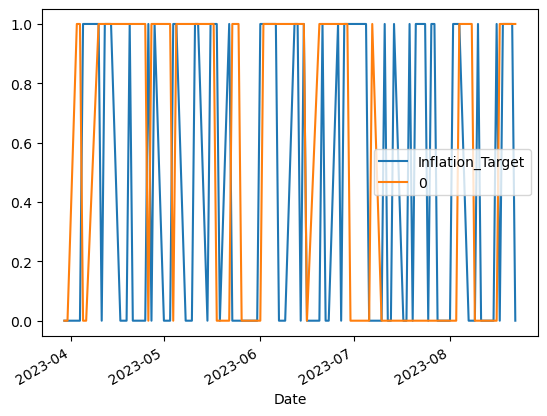

In [213]:
combined = pd.concat([test["Inflation_Target"], preds], axis=1)
combined.plot()

In [214]:
# def predict(train, test, predictors, model):
    
#     model.fit(train[predictors], train["Inflation_Target"])
#     preds = model.predict(test[predictors])
#     preds = pd.Series(preds, index=test.index, name="Predictions")
#     combined = pd.concat([test["Inflation_Target"], preds], axis=1)
#     return combined

In [215]:
# def backtest(data, model, predictors, start=2500, step=250):
#     all_predictions = []

#     for i in range(start, data.shape[0], step):
#         train = data.iloc[0:i].copy()
#         test = data.iloc[i:(i+step)].copy()
#         predictions = predict(train, test, predictors, model)
#         all_predictions.append(predictions)
    
#     return pd.concat(all_predictions)

In [217]:
predictions = backtest(macro_index, model, predictors)

KeyError: 'Target'

In [ ]:
predictions["Predictions"].value_counts()

0    745
1    662
Name: Predictions, dtype: int64

In [ ]:
precision_score(predictions["Inflation_Target"], predictions["Predictions"])

0.43051359516616317

In [ ]:
predictions["Inflation_Target"].value_counts() / predictions.shape[0]

0    0.554371
1    0.445629
Name: Inflation_Target, dtype: float64

In [ ]:
predictions

,Inflation_Target,Predictions
Date,,
2018-01-03,1,1
2018-01-04,0,1
2018-01-05,1,1
2018-01-08,1,1
2018-01-09,0,1
...,...,...
2023-08-16,1,0
2023-08-17,0,1
2023-08-18,1,1


Unsupervised learning 

In [ ]:
macro_index.head()

,DFF,Inflation_Rate,Average_Dow,Average_Nasdaq,Average_S&P,next_Inflation_Rate,Inflation_Target
Date,,,,,,,
2008-01-02,4.11,2.32,14547.08,2631.435,1447.160,2.33,1
2008-01-03,4.25,2.33,14524.54,2607.540,1447.160,2.32,0
2008-01-04,4.18,2.32,14154.51,2537.865,1411.630,2.29,0
2008-01-07,4.27,2.29,14168.24,2506.280,1417.075,2.29,0
2008-01-08,4.27,2.29,14048.90,2474.255,1406.170,2.26,0


In [ ]:
import hvplot.pandas

macro_index.hvplot.line(
    width=900,
    height=500,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [ ]:
macro_index.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3907 entries, 2008-01-02 to 2023-08-22
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DFF                  3907 non-null   float64
 1   Inflation_Rate       3907 non-null   float64
 2   Average_Dow          3907 non-null   float64
 3   Average_Nasdaq       3907 non-null   float64
 4   Average_S&P          3907 non-null   float64
 5   next_Inflation_Rate  3906 non-null   float64
 6   Inflation_Target     3907 non-null   int32  
dtypes: float64(6), int32(1)
memory usage: 228.9 KB


In [ ]:
scaled_index_data = StandardScaler().fit_transform(macro_index[["DFF","Inflation_Rate","Average_Dow",
                                                             "Average_Nasdaq","Average_S&P","Inflation_Target"
                                                             ]])

scaled_index_data[0:3]

array([[ 2.66643179,  0.7779786 , -0.83585357, -0.89536682, -0.79558397,
         1.14714666],
       [ 2.78134134,  0.80197527, -0.83790907, -0.90144454, -0.79558397,
        -0.87172812],
       [ 2.72388657,  0.7779786 , -0.87165343, -0.91916644, -0.82852912,
        -0.87172812]])

In [ ]:
scaled_index_data_df = pd.DataFrame(scaled_index_data,columns=["DFF","Inflation_Rate","Average_Dow",
                                                             "Average_Nasdaq","Average_S&P","Inflation_Target"
           ])


scaled_index_data_df["Date"] = macro_index.index

scaled_index_data_df =scaled_index_data_df.set_index('Date')


# Display sample data
scaled_index_data_df.head()

,DFF,Inflation_Rate,Average_Dow,Average_Nasdaq,Average_S&P,Inflation_Target
Date,,,,,,
2008-01-02,2.666432,0.777979,-0.835854,-0.895367,-0.795584,1.147147
2008-01-03,2.781341,0.801975,-0.837909,-0.901445,-0.795584,-0.871728
2008-01-04,2.723887,0.777979,-0.871653,-0.919166,-0.828529,-0.871728
2008-01-07,2.797757,0.705989,-0.870401,-0.927200,-0.823480,-0.871728
2008-01-08,2.797757,0.705989,-0.881284,-0.935346,-0.833592,-0.871728


In [ ]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))


In [ ]:
from sklearn.cluster import KMeans

inertia =[]
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(scaled_index_data_df)
    inertia.append(k_model.inertia_)


c:\Users\sudha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sudha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sudha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sudha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sudha\anaconda3\lib\site-packages\sklearn\clust

In [ ]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)


df_elbow.head()


,k,inertia
0,1,23442.000000
1,2,13820.095268
2,3,11198.635284
3,4,9010.150549
4,5,7281.523676


In [ ]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot = df_elbow.hvplot.line(
    x="k",
    y="inertia",
    title = "Elbow_curve for original macro index data",
    xticks=k
)
elbow_plot

:Curve   [k]   (inertia)

In [ ]:
model = KMeans(n_clusters=4, random_state=0)
model.fit(scaled_index_data_df)


c:\Users\sudha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [ ]:
# Predict the clusters to group the cryptocurrencies using the scaled data
K_predictions = model.predict(scaled_index_data_df)


# Print the resulting array of cluster values.
K_predictions

array([2, 3, 3, ..., 0, 0, 0])

In [ ]:
index_data_prediction_df = scaled_index_data_df.copy()
index_data_prediction_df['macro_segments'] = K_predictions
index_data_prediction_df.head()

,DFF,Inflation_Rate,Average_Dow,Average_Nasdaq,Average_S&P,Inflation_Target,macro_segments
Date,,,,,,,
2008-01-02,2.666432,0.777979,-0.835854,-0.895367,-0.795584,1.147147,2
2008-01-03,2.781341,0.801975,-0.837909,-0.901445,-0.795584,-0.871728,3
2008-01-04,2.723887,0.777979,-0.871653,-0.919166,-0.828529,-0.871728,3
2008-01-07,2.797757,0.705989,-0.870401,-0.927200,-0.823480,-0.871728,3
2008-01-08,2.797757,0.705989,-0.881284,-0.935346,-0.833592,-0.871728,3


In [ ]:
#scatter plot for Average dow with inflation rate
original_scater_plot = index_data_prediction_df.loc['2020-01-01':'2023-02-01'].hvplot.scatter(
    x="Inflation_Rate",
    y="Average_Nasdaq",
    by="macro_segments",
    hover_cols = "Date"
)
original_scater_plot

:NdOverlay   [macro_segments]
   :Scatter   [Inflation_Rate]   (Average_Nasdaq,Date)

In [ ]:
print(index_data_prediction_df.loc['2020-01-01':'2023-02-01'])


                 DFF  Inflation_Rate  Average_Dow  Average_Nasdaq  \
Date                                                                
2020-01-02  0.565229       -0.469848     0.868452        0.741227   
2020-01-03  0.565229       -0.541838     0.847834        0.724128   
2020-01-06  0.565229       -0.589832     0.849521        0.726387   
2020-01-07  0.565229       -0.613828     0.857572        0.742954   
2020-01-08  0.565229       -0.589832     0.863197        0.749572   
...              ...             ...          ...             ...   
2023-01-26  2.847004        0.801975     1.562702        1.356650   
2023-01-27  2.847004        0.801975     1.571396        1.372084   
2023-01-30  2.847004        0.705989     1.544299        1.348426   
2023-01-31  2.847004        0.586005     1.564736        1.358216   
2023-02-01  2.847004        0.610002     1.608919        1.409891   

            Average_S&P  Inflation_Target  macro_segments  
Date                                      

In [ ]:
#scatter plot for Average dow with inflation rate
original_scater_plot = index_data_prediction_df.hvplot.scatter(
    x="Inflation_Rate",
    y="Average_Dow",
    by="macro_segments",
    hover_cols = "Date"
)
original_scater_plot

:NdOverlay   [macro_segments]
   :Scatter   [Inflation_Rate]   (Average_Dow,Date)

In [ ]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

In [ ]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
market_data_pca = pca.fit_transform(index_data_prediction_df)

# View the first five rows of the DataFrame. 
market_data_pca[0:5]

array([[-0.47170283,  0.38967337, -1.44562962],
       [-1.03829155, -1.60454088, -0.596216  ],
       [-1.09605128, -1.58286763, -0.58440171],
       [-1.08896477, -1.56062255, -0.52079155],
       [-1.10271965, -1.55915003, -0.52400548]])

In [ ]:
pca.explained_variance_ratio_

array([0.59211367, 0.15519528, 0.1227218 ])

In [ ]:
total_variance = np.sum(pca.explained_variance_ratio_)
total_variance


0.8700307494514062

In [ ]:
df_market_data_pca = pd.DataFrame(
    market_data_pca,
    columns=["PC1", "PC2","PC3"]
)


# Copy the crypto names from the original data

df_market_data_pca["Date"] = macro_index.index

# Set the coinid column as index
df_market_data_pca =df_market_data_pca.set_index("Date")

# Display sample data
df_market_data_pca.head()


,PC1,PC2,PC3
Date,,,
2008-01-02,-0.471703,0.389673,-1.445630
2008-01-03,-1.038292,-1.604541,-0.596216
2008-01-04,-1.096051,-1.582868,-0.584402
2008-01-07,-1.088965,-1.560623,-0.520792
2008-01-08,-1.102720,-1.559150,-0.524005
